$~~~~~~~~~~~$<img src="https://moodlesupd.script.univ-paris-diderot.fr/pluginfile.php/1/theme_foundation/frontpageslideimage1/1585262946/moodle_logo.png" width="350" />
$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$
<img src="http://www.apc.univ-paris7.fr/APC_CS/sites/default/files/logo-apc.png" />


<center>
<h1>
Etude des catalogues COSMOS et True Universe à l'aide des Self Organizing Maps
</h1> 
</center>



<center>

Stage de Master Physique 1 - 2020

Encadrants : Alexandre BOUCAUD, Hubert BRETONNIERE

Rapporteur : Yann RASERA

Stage effectué au sein du laboratoire Astroparticules & Cosmologie sur une durée de 2 mois.

Olivier ROTH
</center>

## Introduction

Ce stage s'inscrit dans la mission Euclid, un téléscope spatial dont le lancement est prévu pour 2022, "destinée à percer les mystères de l’énergie noire et de la matière noire" d'après l'ESA.

Pour y parvenir, le satellite étudiera des galaxies qui se trouvent à différentes distances de la Terre et tirera avantage du faible effet de lentille gravitationnelle, qui mesure la distorsion des galaxies lointaines causée par de la matière qui s’interpose, ainsi que des oscillations acoustiques des baryons, obtenues en mesurant l’agglomération des galaxies, pour obtenir une image en 3D de l’évolution de la distribution de la matière noire et de la matière ordinaire (baryonique) dans le cosmos.

\\

Afin d'identifier certains types de galaxies, nous avons besoin d'entrainer des algorithmes à l'avance avec des données. Et pour savoir si ces données sont bien et pleinement représentatives de la réalité, nous allons confronter un catalogue issu d'une simulation avec un catalogue provenant de données réelles au moyen d'un outil de machine learning faisant appel à l'apprentissage non-supervisé les Self Organizing Maps (SOMs).


Ces réseaux utilisent essentiellement la quantification vectorielle pour détecter des patterns dans des données multidimensionnelles et les représenter dans des espaces à dimensions beaucoup plus faibles, généralement en deux dimensions.

La faible dimension de la carte résultante permet une présentation graphique des données qui peut être facilement interprétée par l'homme.




## Sommaire


 ##  [Théorie sur les SOMs](#S3)
> ### [Exemple avec un jeu de données de couleurs](#S3_1)
> ### [Heatmap](#S3_2)
> ### [Erreurs](#S3_3)


 ##   [Application des SOMs aux catalogues COSMOS et True Universe](#S4)
> ### [Variables](#S4_2)
> ### [Dépeuplement des fortes magnitudes](#S4_4)

<a name="S3"></a>

<ins>
<h1> 
Théorie sur les SOMs
</h1>
</ins>


Les SOMs diffèrent des autres réseaux neuronaux artificiels car elles appliquent l'apprentissage compétitif par opposition à l'apprentissage par correction d'erreurs (comme la backpropagation avec descente de gradient), et dans le sens où elles utilisent une fonction de voisinage pour préserver les propriétés topologiques de l'espace d'entrée.


Les cartes obtenus sont constituées de neurones, disposés selon la topologie choisie (par exemple rectangulaire ou hexagonale). Chaque neurone est associé à un vecteur “poids" ayant la même dimension que chaque vecteur d'entrée.


Alors que les neurones de l'espace cartographique restent fixes, l'entraînement consiste à déplacer des vecteurs de poids vers les données d'entrée (réduisant une métrique de distance) sans altérer la topologie induite de l'espace cartographique.  Ainsi, le SOM décrit une mise en correspondance d'un espace d'entrée de dimension supérieure à un espace cartographique de dimension inférieure. Une fois formée, la carte peut classer un vecteur de l'espace d'entrée en trouvant le neurone avec le vecteur de poids le plus proche du vecteur de l'espace d'entrée.


Les poids des neurones sont initialisés soit à de petites valeurs aléatoires, soit échantillonnés de manière égale depuis le jeu de données de l'entrée. Avec cette dernière alternative, l'apprentissage est beaucoup plus rapide car les poids initiaux donnent déjà une bonne approximation des poids du SOM.




Concrètement, par étapes :

 1. On initialise les poids soit aléatoirement, soit depuis un échantillonnage de jeu de données

 2. On choisit un vecteur d'entrée au hasard

 3. On traverse chaque neurone de la carte

 a. On utilise la distance euclidienne pour trouver les similarités entre le vecteur d'entrée et le vecteur de poids du neurone de la carte

 b. On repère le neurone qui a la plus petite distance (ce neurone est appelé le Best Matching Unit, BMU)

 4. On met à jour les vecteurs de poids des neurones situés dans le voisinage de le BMU (y compris le BMU elle-même) en les rapprochant du vecteur d'entrée.

 5. On répète depuis l'étape 2 jusqu'à un nombre d'itération défini à l'avance


A chaque itération, un paramètre entre en jeu pour définir la zone qui sera modifiée, c'est "sigma". Il diminue au cours de l'entrainement pour affiner l'apprentissage. Un autre paramètre permet de gérer cette vitesse d'apprentissage, c'est le "learning rate".

\\

Parmi les grandes questions autour des SOMs, les plus importantes et compliquées à la fois sont : quelle est la taille adéquate de la carte pour bien représenter les données, quel sigma et learning rate initiaux doit-on prendre et enfin, le réseau a-t-il convergé au terme de l'apprentissage ?



<a name="S3_1"></a>

<ins>
<h2> 
Exemple avec un jeu de données de couleurs
</h2>
</ins>


On a pris un jeu de données uniforme de 250 000 couleurs, avec des perturbations (ici il y a un peu moins de rouge que de vert par exemple). Le sigma est à 14, le learning rate à 1 et on a entrainé sur 2000 itérations

<a name="fig1"></a>


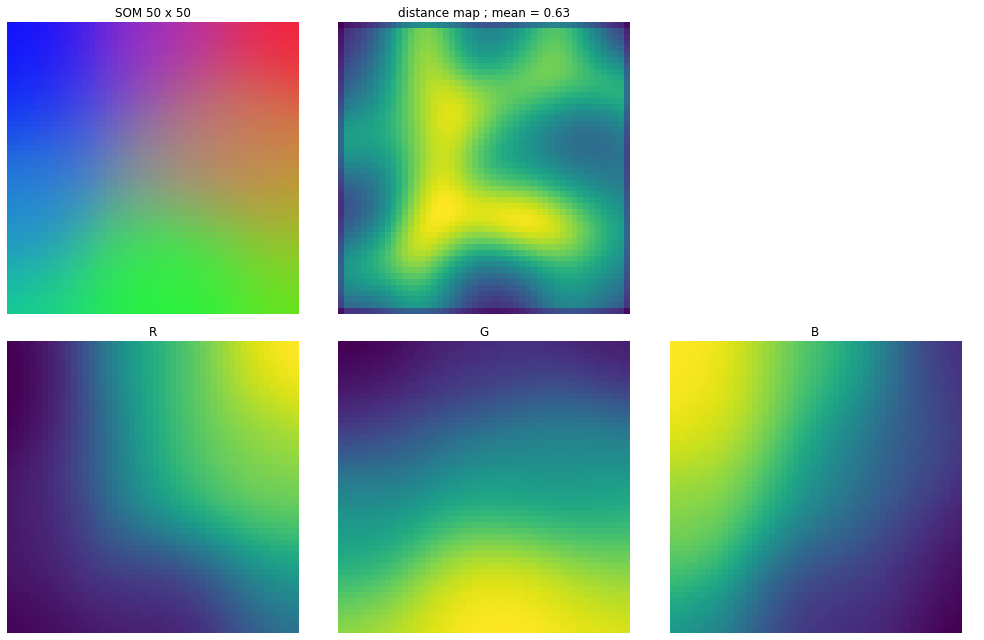

In [ ]:
sigma = 14
learning_rate = 1

som, weights = train_som(data_color_norm, sigma, learning_rate, 2000)
PlotSOMs(data_color_norm, som, weights)

<center>
Figure 1 : SOM, topologie rectangulaire, distance map, poids de chaque couleur
</center>

À l'issue de l'entrainement les couleurs sont classées comme on peut le voir sur le graphique en haut à gauche de la figure [1](#fig1).

Les poids de chaque couleur, les trois graphiques en bas, sont bien dissociés et chaque couleur est formée d'un seul cluster.

La "distance map" aussi appelée "U-matrix" nous permet de voir les limites entre les couleurs. Si deux couleurs proches dans le spectre se trouve à côté alors leur distance sera faible et le pixel représentant cette distance sur la distance map sera foncé.
Elle est la traduction de la distance euclidienne entre chaque pixels, c'est pourquoi cette distance est plus faible sur les bords (et encore plus sur les coins) qui possèdent moins de pixels voisins.

On peut également faire un entrainement avec une topologie hexagonale. le résultat est censé être meilleur puisque chaque neurone possède 6 voisins directs au lieu de 4 dans une topologie rectangulaire, donnant une flexibilitée plus grande.

<a name="fig2"></a>

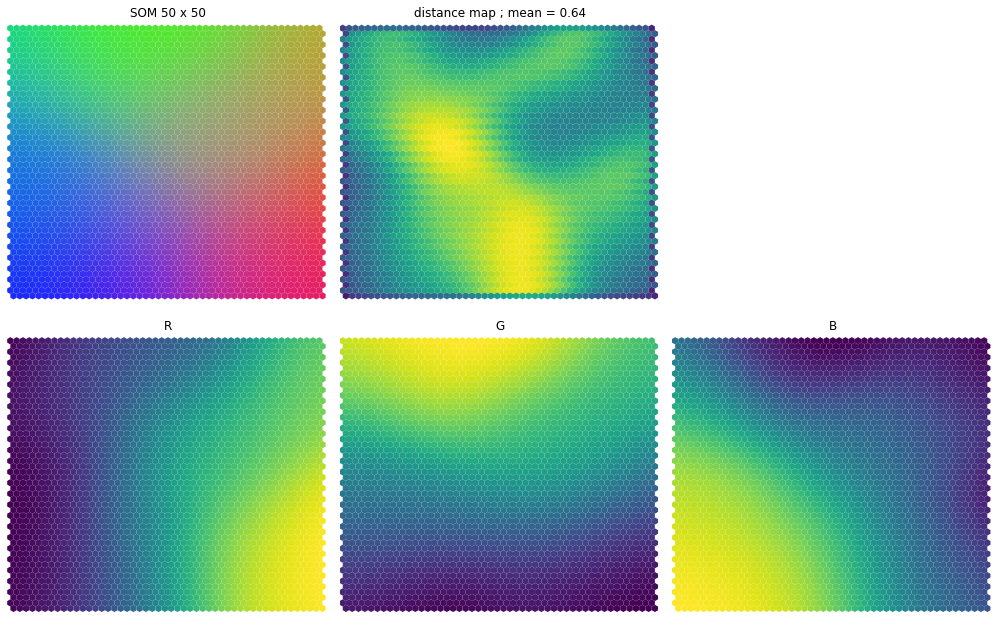

In [ ]:
# SOMs
sigma = 14
learning_rate = 1

som_hexa, weights_hexa = train_som(data_color_norm, sigma, learning_rate, 1000, topology='hexagonal')
PlotSOMs(data_color_norm, som_hexa, weights_hexa, topology='hexagonal')

<center>
Figure 2 : SOM, topologie hexagonale, distance map, poids de chaque couleur
</center>

Les couleurs étant assez facile à classer, que ce soit en topologie rectangulaire ou hexagonale, le résultat est assez bon. Chaque couleur ne forme qu'un seul cluster, toujours éloigné au maximum des autres.

<a name="S3_2"></a>

<ins>
<h2> 
Heatmap
</h2>
</ins>


Une fois le réseau entrainé, on peut l'utiliser pour classer un nouveau jeu de données.

On regarde où tombe un jeu de données de 10 000 couleurs majoritairement bleues sur la carte en figure [1](#fig1) :

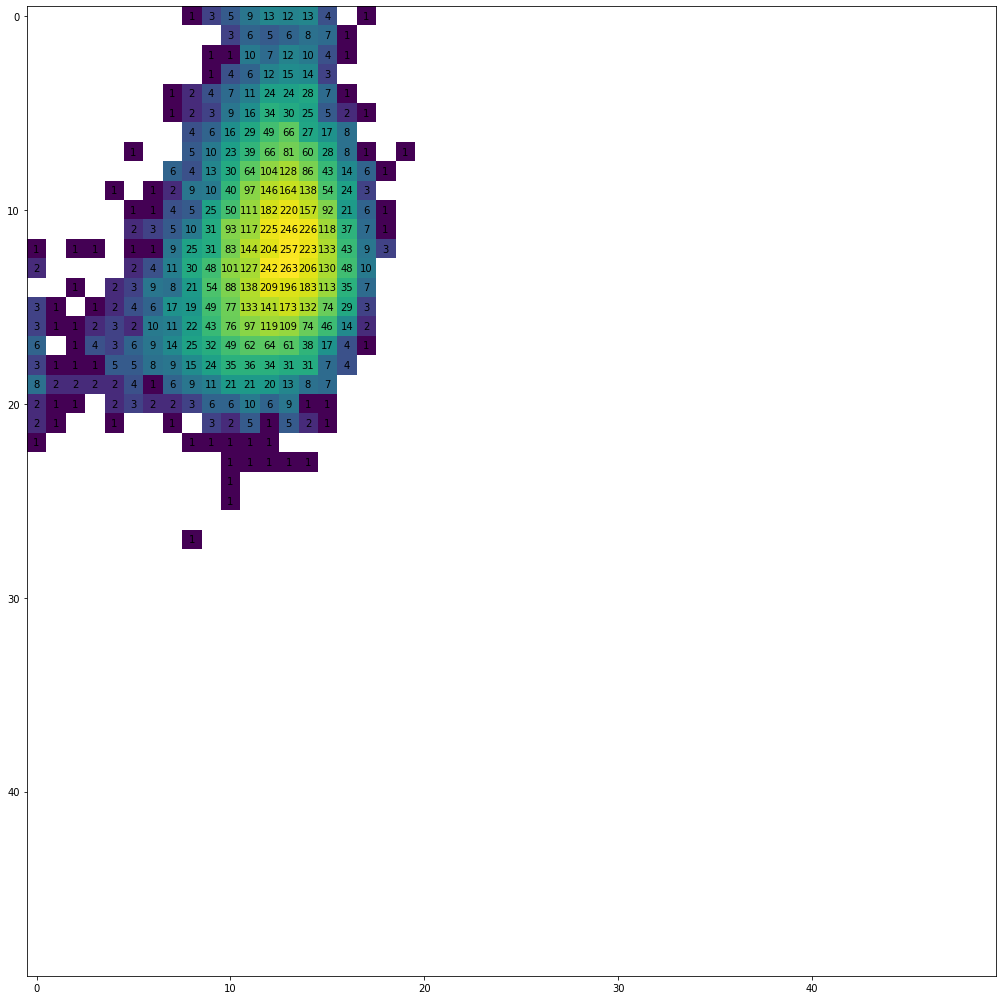

In [ ]:
Heatmap(som, data_blue, hist_vars=False) # gauss, norm : .2, .2, .7

<center>
Figure 3 : Heatmap rectangulaire, activation de la carte en réponse à un jeu de données bleu
</center>

On voit que notre jeu de données majoritairement bleu tombe bien la où le bleu est réparti sur la map.\
Puisqu'on a pris un bleu léger, un peu de rouge et de vert, les points de la heatmap ne sont pas à l'extrémité du bleu du SOM.

Chaque neurone a été activé un certain nombre de fois, ce nombre est présent sur les pixels de la heatmap.


De la même manière, en topologie hexagonale, avec la carte de la figure [2](#fig2):

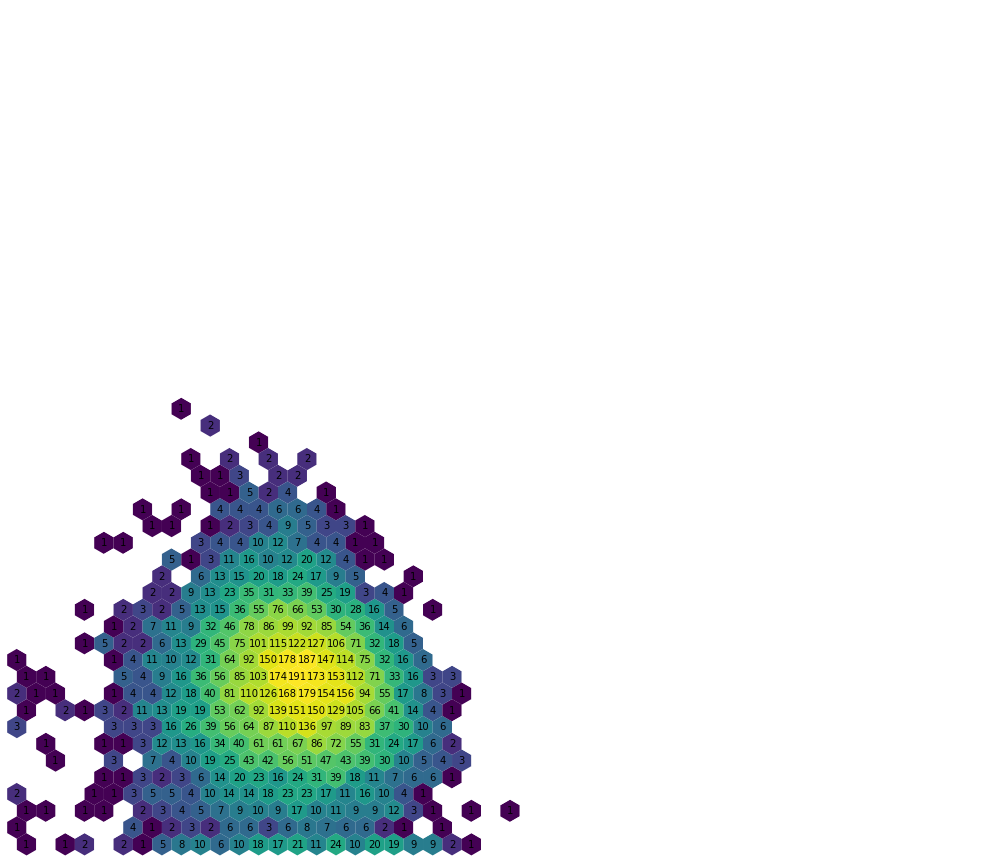

In [ ]:
Heatmap(som_hexa, data_blue, hist_vars=False, topology='hexagonal')# gauss, norm : .2, .2, .7

<center>
Figure 4 : Heatmap hexagonale, activation de la carte en réponse à un jeu de données bleu
</center>

Là aussi la zone activée par le jeu de données bleu correspond bien à l'emplacement du bleu sur la figure [2](#fig2).

<a name="S3_3"></a>

<ins>
<h2> 
Erreurs
</h2>
</ins>

 Afin de s'assurer que ces modèles sont effectivement représentatifs des données sous-jacentes, il est essentiel d'évaluer la qualité des cartes.

 Pour cela, à l'aide d'un échantillon d'entrainement et de test, on regarde l'évolution de certains paramètres : la "quantization error", la "topological error", la moyenne de la distance map.

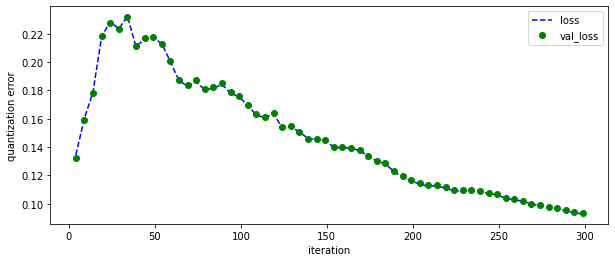

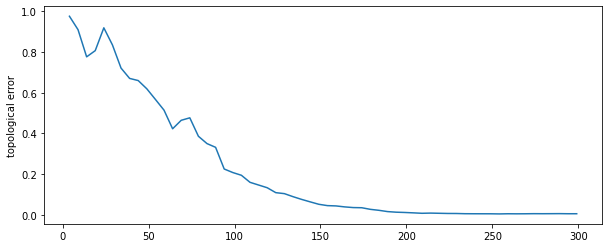

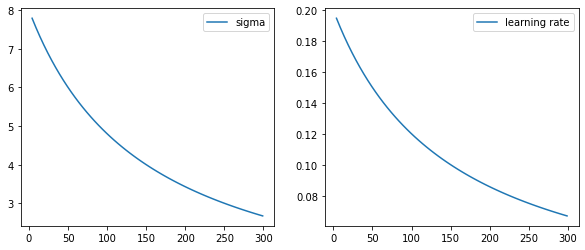

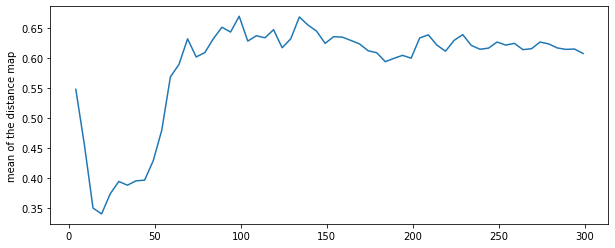

In [ ]:
plot_error(dict_vars)

<center>
Figure 5 : De haut en bas, la quantization error, la topological error, sigma et learning rate, la moyenne de la distance map
</center>

Au cours de l'entrainement, on peut voir que la "quantization error" (calculée comme étant la distance moyenne entre chaque échantillon d'entrée et l'unité qui lui correspond le mieux) diminue. \
Mais le jeu de données de test étant quasiment identique au jeu de données d'entrainement (à l'origine le jeu de données composé de couleurs aléatoires), il n'y a pas de déviation entre les deux. On ne peut donc pas observer un jeu de données de validation pour obtenir un critère de convergence comme c'est le cas dans une grande partie des réseaux de neurones en machine learning.

\
L'erreur topologique (traduisant l'éloignement des clusters de couleurs identiques) diminue elle aussi. 
Pour tous les échantillons de données, on détermine les meilleures et les deuxièmes meilleures unités correspondantes. Si ces unités ne sont pas adjacentes sur la carte, on considère cela comme une erreur topographique.

\
Ensuite, on peut voir le sigma et le learning rate diminuer au fil des itérations pour augmenter la précision de la cartographie.

\
Enfin, on peut voir l'évolution de la moyenne de la distance map. Elle se stabilise au bout de quelques itérations du fait de la réduction du sigma : les changements sont si petits que la distance map n'évolue plus beaucoup.


<a name="S4"></a>

<ins>
<h1> 
Application des SOMs aux catalogues COSMOS et True Universe
</h1>
</ins>


<figure>
<center>
<img src="https://i.ibb.co/HqXsLyB/GxCOSMOS.png" alt="GxCOSMOS" border="0">
<figcaption>Galaxies du catalogue COSMOS, indice de Sersic en abscisse et ellipticité en ordonnée.</figcaption></center>
</figure>


Définir indice de sersic, hlr, q


L'indice de Sersic décrit comment le profil lumineux d'une galaxie varie en fonction du rayon. Plus le sersic est grand et plus la lumière est concentrée au centre de la galaxie ???

Le rayon effectif ou rayon de demi-lumière (half light radius) d'une galaxie est le rayon où la moitié de la lumière totale est émise.

q correspond à 1-e avec e l'ellipticité

<a name="S4_2"></a>

<ins>
<h2> 
Variables
</h2>
</ins>



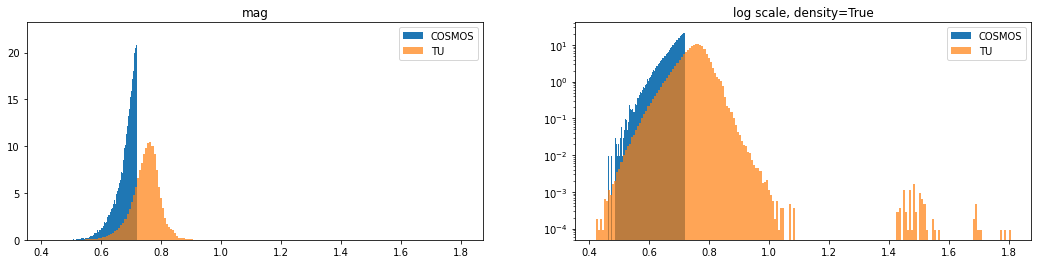

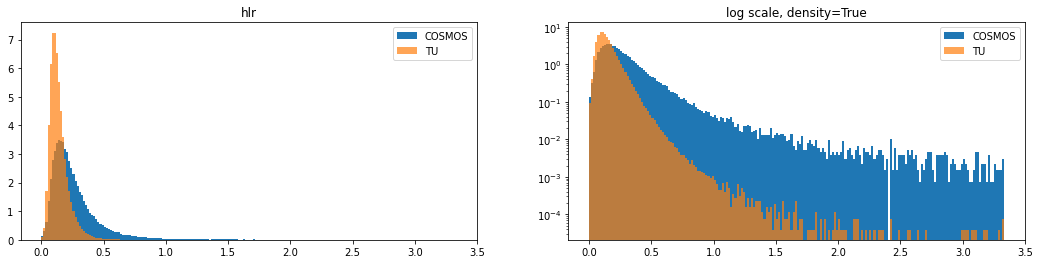

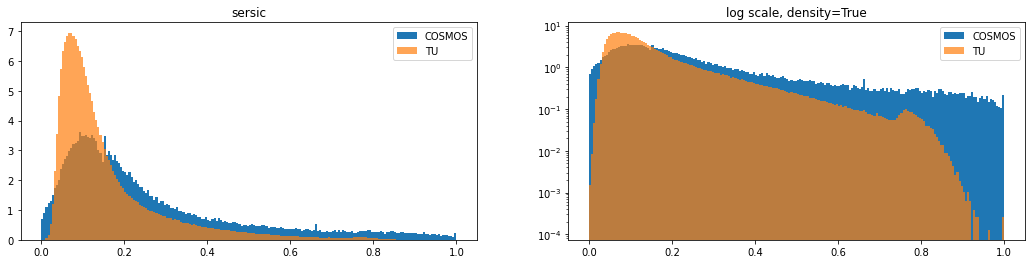

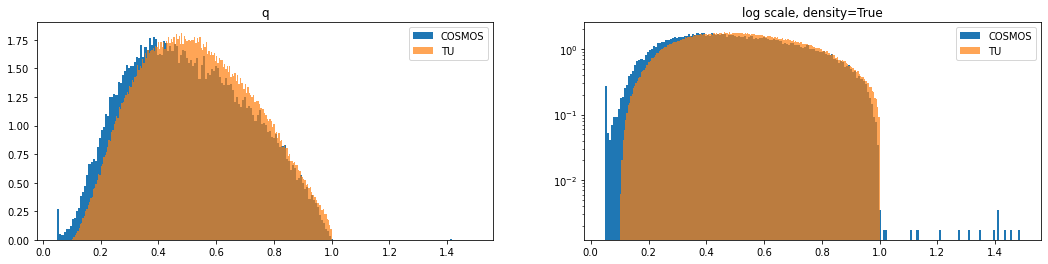

In [ ]:
compare_CS_TU(data_cs_, data_tu_fuse_)

<a name="S4_4"></a>

<ins>
<h2> 
Dépeuplement des fortes magnitudes
</h2>
</ins>




#### Visualization of the "issue"

datasets normalized, training on TU, Heatmap on COSMOS

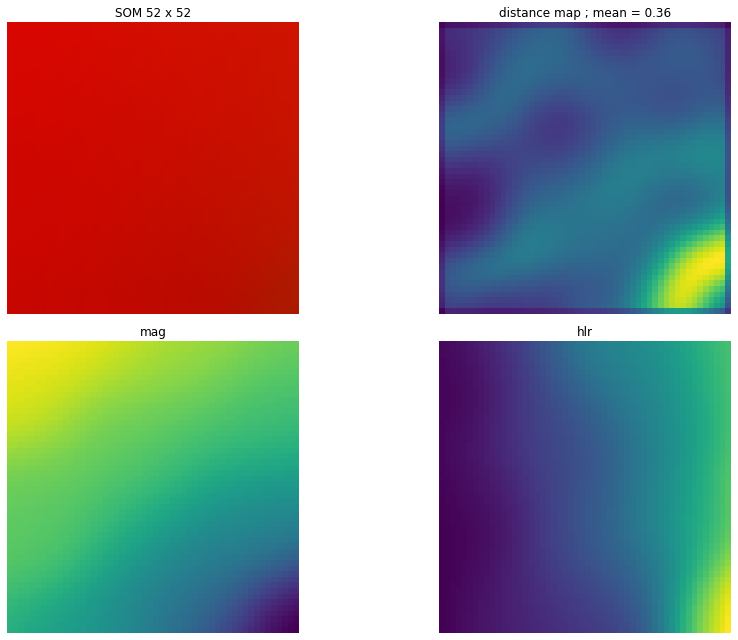

In [ ]:
sigma = 12
learning_rate = 1
topo = 'rectangular'

som_tu, weights_tu = train_som(choice_tu, sigma, learning_rate, 2000, topology=topo)
PlotSOMs(choice_tu, som_tu, weights_tu, vars_tu, topology=topo)

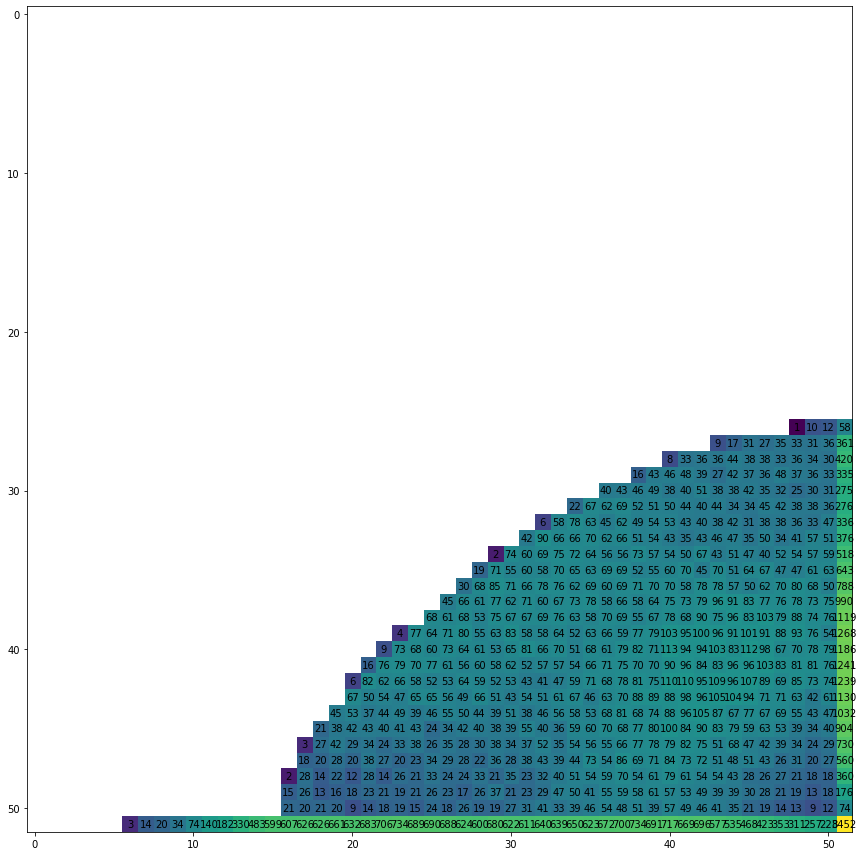

In [ ]:
Heatmap(som_tu, choice_cs, figsize=(12,12), topology=topo)

visualiazation of heatmaps for TU mag sup/inf max(mag(TU))

In [ ]:
mag_tu_sup_cs = data_tu_['mag'][np.where(data_tu_['mag']>0.7636)[0]]
hlr_mag_tu_sup_cs = data_tu_['hlr'][np.where(data_tu_['mag']>0.7636)[0]]

cut_mag_sup = np.vstack([mag_tu_sup_cs, hlr_mag_tu_sup_cs]).T

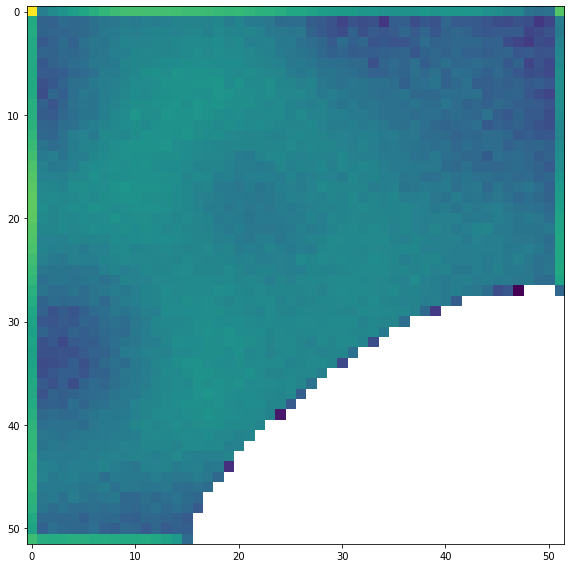

In [ ]:
Heatmap(som_tu, cut_mag_sup, hit_count=False, figsize=(8,8), topology=topo)

In [ ]:
mag_tu_inf_cs = data_tu_['mag'][np.where(data_tu_['mag']<0.7636)[0]]
hlr_mag_tu_inf_cs = data_tu_['hlr'][np.where(data_tu_['mag']<0.7636)[0]]

cut_mag_inf = np.vstack([mag_tu_inf_cs, hlr_mag_tu_inf_cs]).T

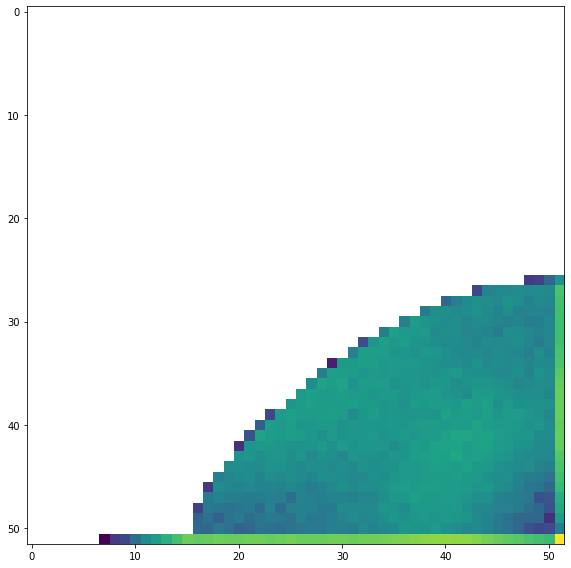

In [ ]:
Heatmap(som_tu, cut_mag_inf, hit_count=False, figsize=(8,8), topology=topo)

---

#### Full TU catalog

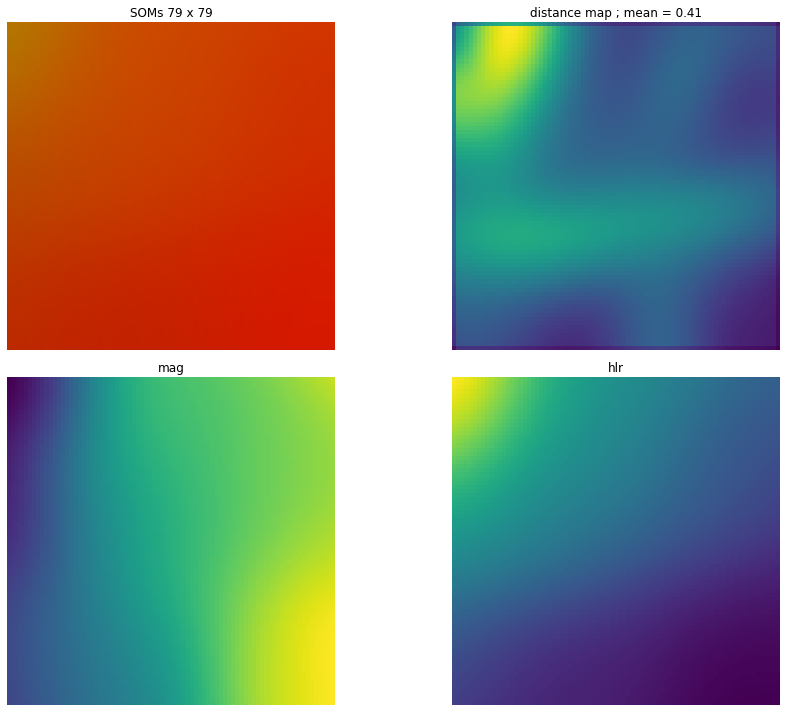

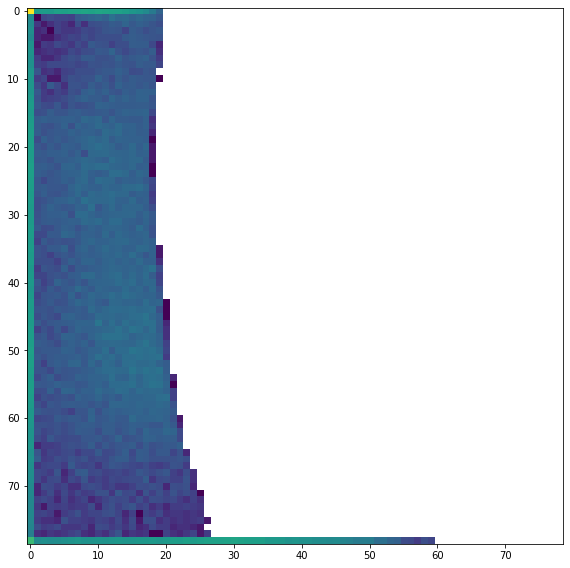

In [ ]:
sigma = 25
learning_rate = 1
topo = 'rectangular'

som_tu, weights_tu = train_som(choice_tu, sigma, learning_rate, 2000, topology=topo)
PlotSOMs(choice_tu, som_tu, weights_tu, vars_tu, topology=topo)

Heatmap(som_tu, choice_cs, hit_count=False, figsize=(8,8), topology=topo)

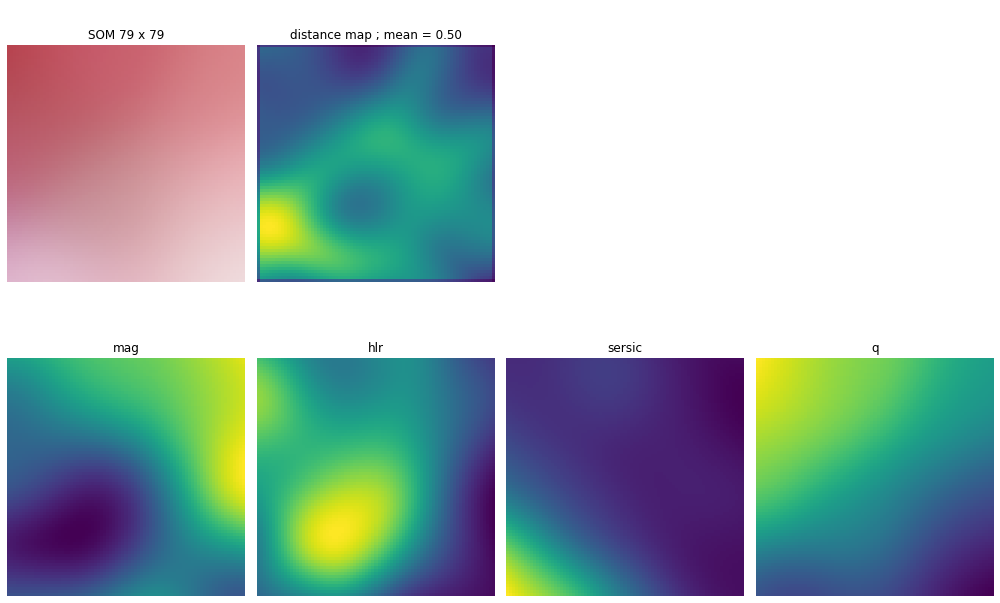

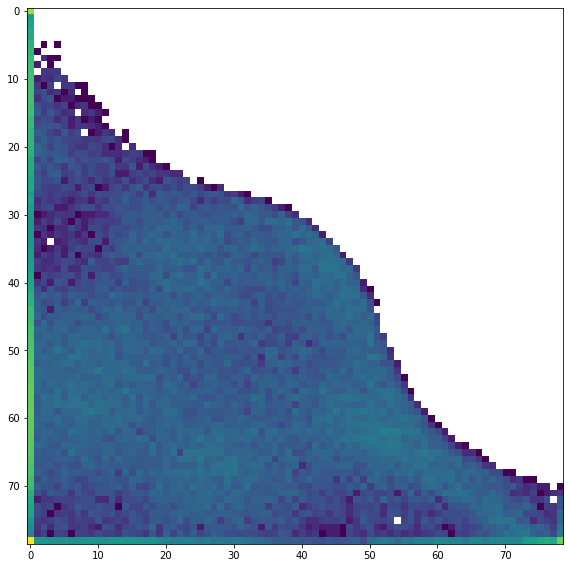

In [ ]:
sigma = 25
learning_rate = 1
topo = 'rectangular'

som_tu, weights_tu = train_som(choice_tu, sigma, learning_rate, 2000, topology=topo)
PlotSOMs(choice_tu, som_tu, weights_tu, vars_tu, topology=topo)

Heatmap(som_tu, choice_cs, hit_count=False, figsize=(8,8), topology=topo)

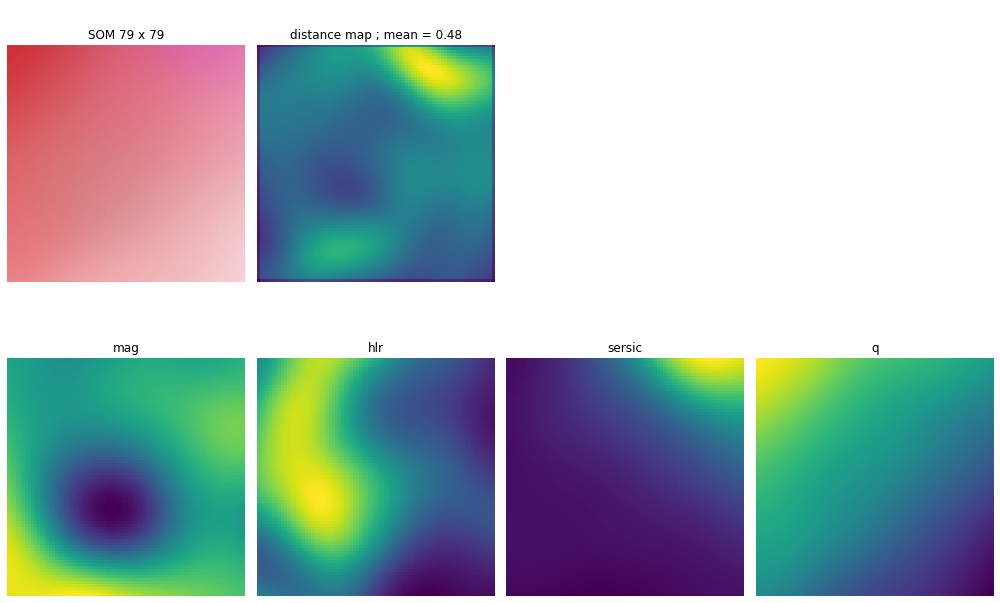

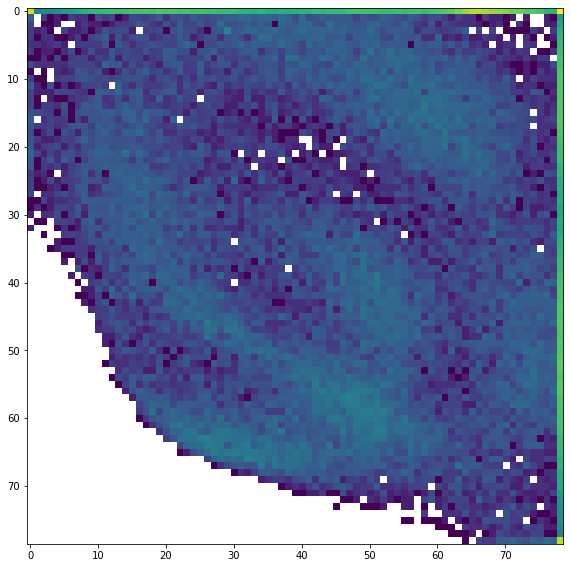

In [ ]:
sigma = 23
learning_rate = 1
topo='rectangular'

som_tu, weights_tu = train_som(choice_tu, sigma, learning_rate, 2000, topology=topo)
PlotSOMs(choice_tu, som_tu, weights_tu, vars_tu, topology=topo)

Heatmap(som_tu, choice_cs, hit_count=False, figsize=(8,8), topology=topo)

 Building hexagonal maps : [ 6241 / 6241 ] ; 100 %

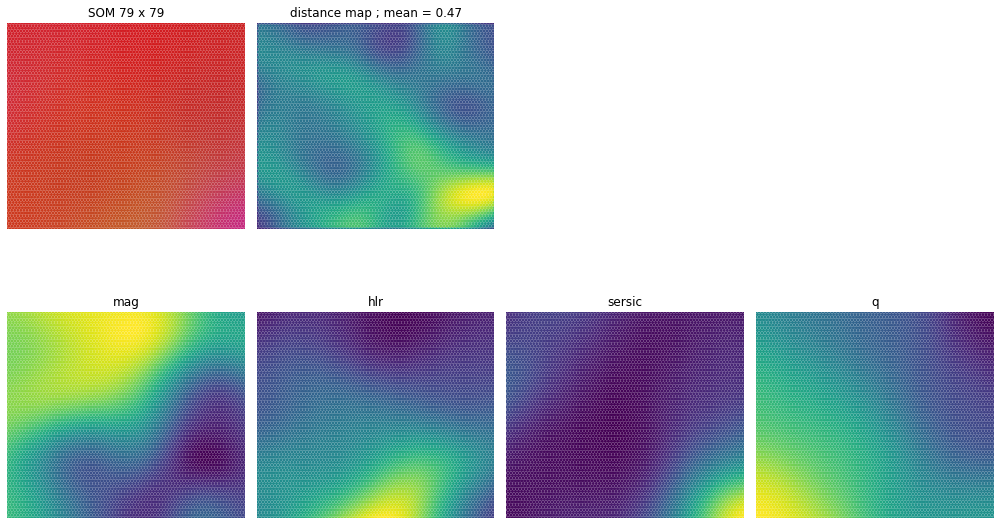

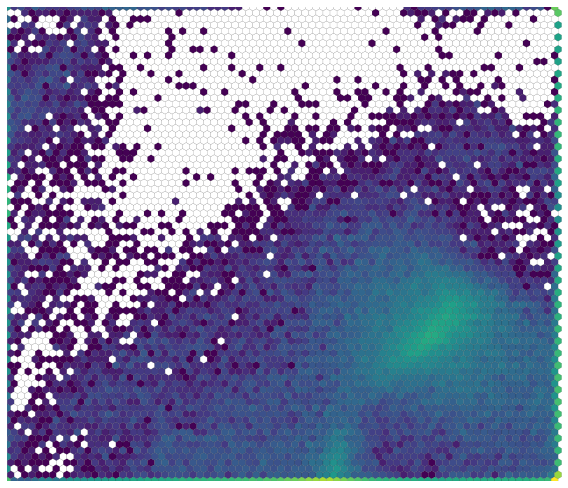

In [ ]:
sigma = 22
learning_rate = 1
topo = 'hexagonal'

som_tu, weights_tu = train_som(choice_tu, sigma, learning_rate, 2000, topology=topo)
PlotSOMs(choice_tu, som_tu, weights_tu, vars_tu, topology=topo)

Heatmap(som_tu, choice_cs, hit_count=False, figsize=(8,8), topology=topo)

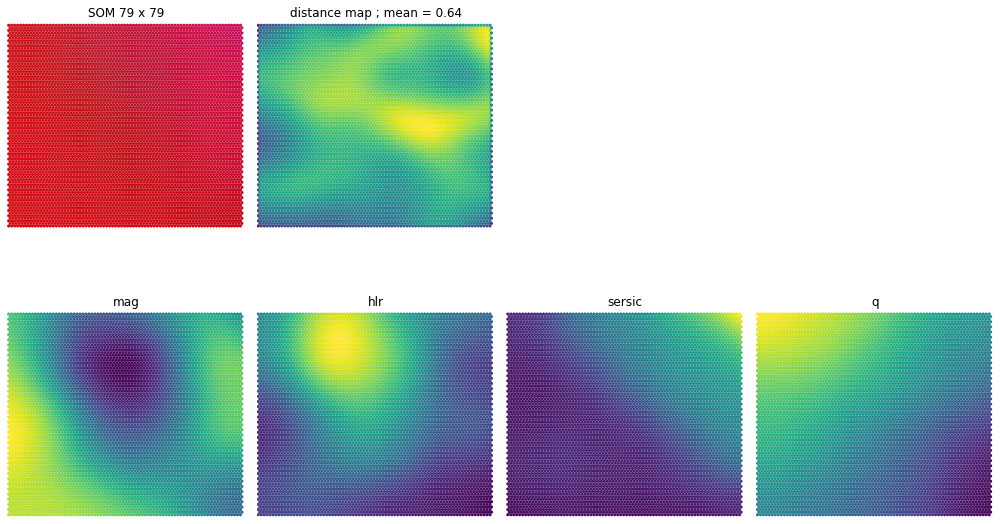

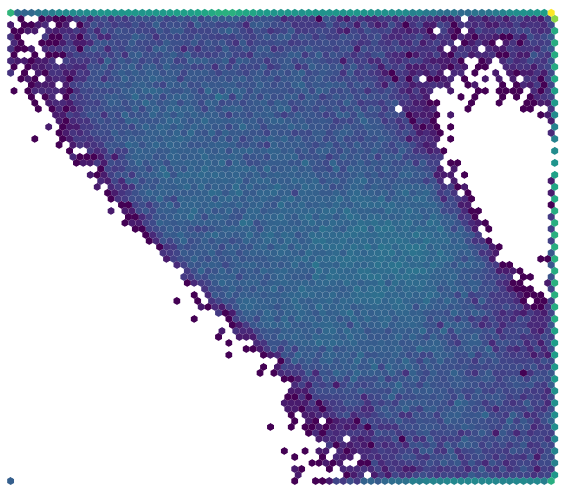

In [ ]:
sigma = 22
learning_rate = 1
topo = 'hexagonal'

som_tu, weights_tu = train_som(choice_tu, sigma, learning_rate, 2000, topology=topo)
PlotSOMs(choice_tu, som_tu, weights_tu, vars_tu, topology=topo)

Heatmap(som_tu, choice_cs, hit_count=False, figsize=(8,8), topology=topo)

---

#### Check Gx properties near mag 25.2 cut

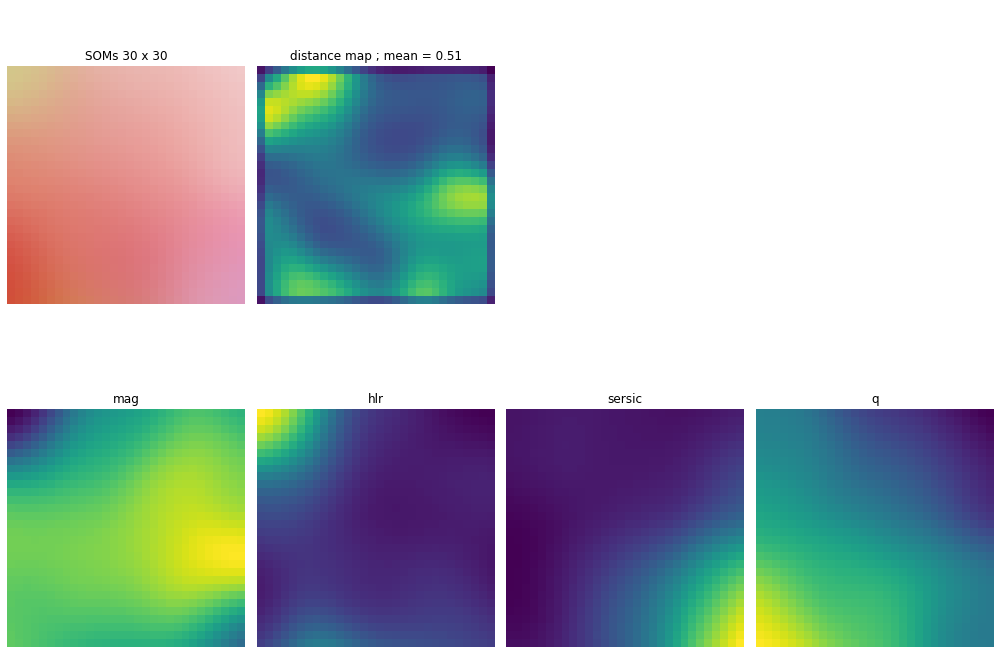

In [ ]:
sigma = 8
learning_rate = 1

som_tu, weights_tu = train_som(xtrain_tu, sigma, learning_rate, 2000, size=(30,30))
PlotSOMs(xtrain_tu, som_tu, weights_tu, vars_tu)

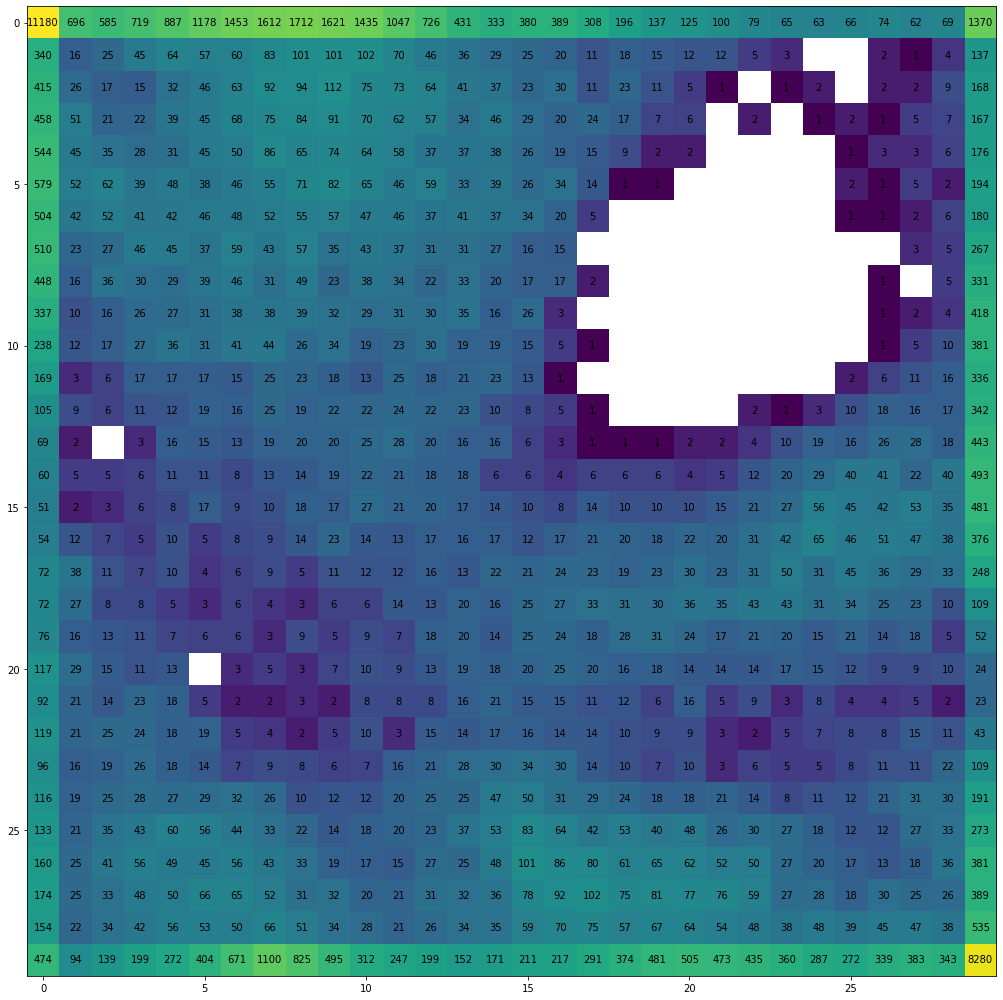

In [ ]:
Heatmap(som_tu, choice_cs, hist_vars=False)

In [ ]:
def act_show(dat, hit=True):
    print(np.argwhere(som_tu.activation_response(dat)))

    plt.imshow(som_tu.activation_response(dat))
    if hit:
        Heatmap(som_tu, choice_cs, figsize=(8,8), hist_vars=False, hit_count=False)

In [ ]:
def get_loc(cat, loc):
    get_idx=[]
    for i,j in enumerate(cat):
        idx = np.argwhere(som_tu.activation_response([j]))[0]
        if sum(idx==loc)==2:
            get_idx.append(i)
    return get_idx

#get_loc(choice_cs, [0,0])

In [ ]:
def check_hist_pos(dat, cat):
    plt.figure(figsize=(18,4))
    for i, vars in enumerate(cat):
        plt.subplot(1,4,i+1)
        plt.title(vars +' ; min=%.2f, max=%.2f\n' % (min(cat[vars]), max(cat[vars])))
        plt.axvline(dat[i], color='k')
        plt.hist(cat[vars], bins=100, density=True)
    plt.tight_layout()
    plt.show()

test hist(s) point proche d'un trou

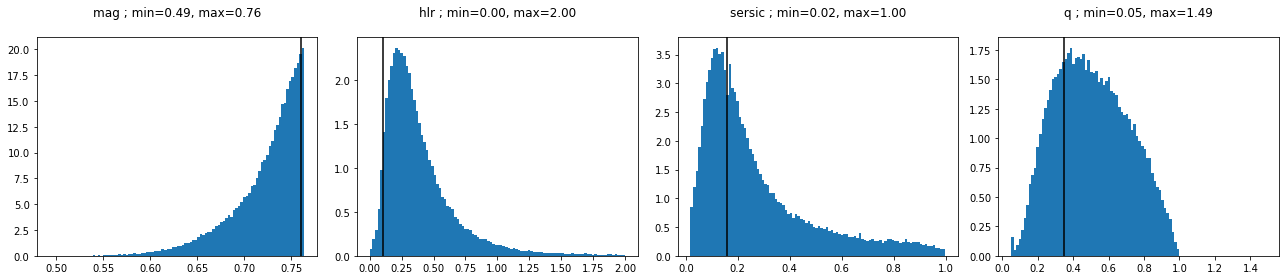

In [ ]:
# galaxie dans COSMOS dont l'activation_response est très proche d'un trou
check_hist_pos(choice_cs[40250], data_cs_norm) # (2, 23) coord inverted -> au dessus du trou

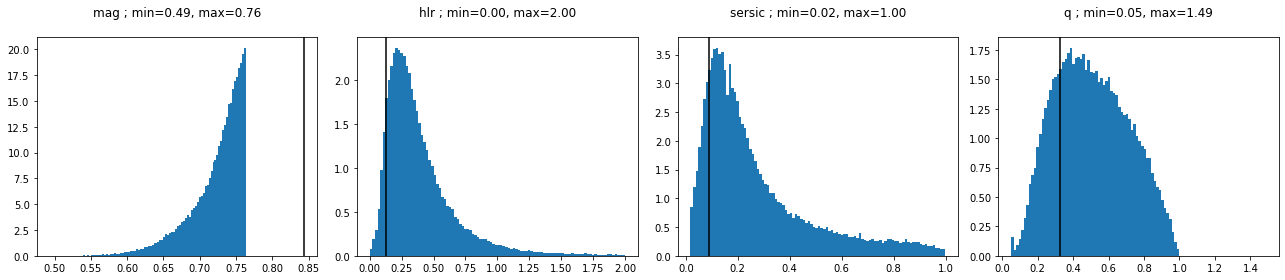

In [ ]:
check_hist_pos(choice_tu[171], data_cs_norm) # (2, 23)

le trou correspond donc bien au manque de Gx à forte mag (sup 25.2) dans CS

dans TU mag > 25.2 pour ce point et ceux du trou


bonne correspondance COSMOS TU pour tous les params sauf mag -> point dans les fortes mag et CS possède une limite à 25.2 en mag

---

ici coin sup gauche, correspond au pic de hlr

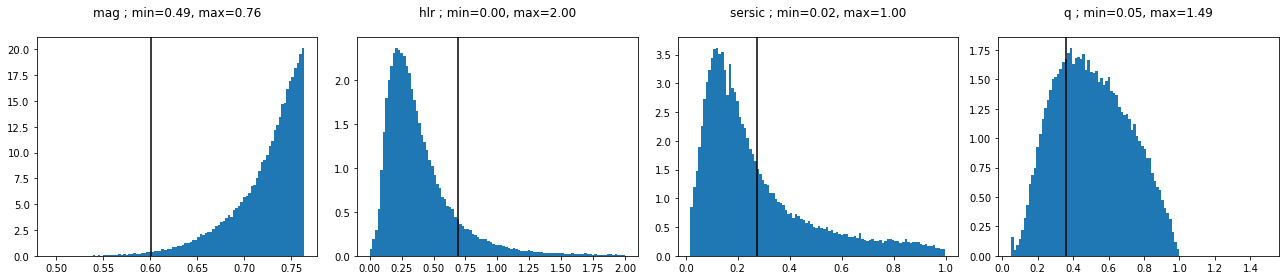

In [ ]:
check_hist_pos(choice_cs[8], data_cs_norm) # (0, 0)

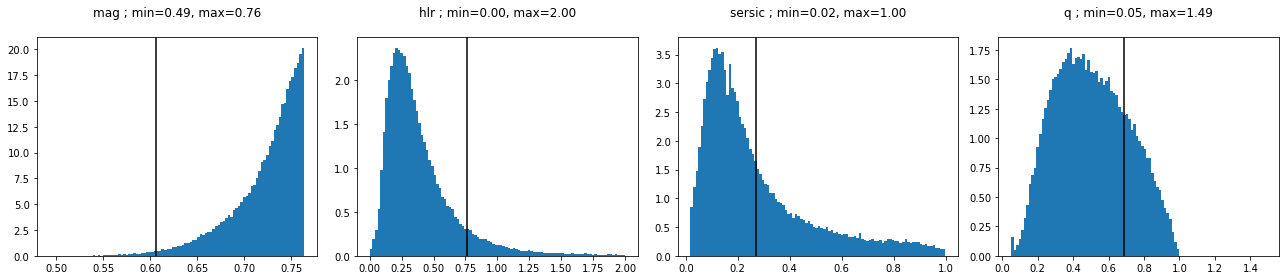

In [ ]:
check_hist_pos(choice_tu[110], data_cs_norm) # (0, 0)

en effet hlr assez fort et mag très faible

bonne correspondance COSMOS TU pour tous les params